Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
from sklearn import datasets

import sys
sys.path.append("./winequilty")
plt.rcParams['figure.figsize'] = (15, 10)

Using TensorFlow backend.


# Load the Data

In [2]:
X_train = np.load('./winequilty/X_train.npy')
y_train = np.load('./winequilty/y_train.npy')
X_test = np.load('./winequilty/X_test.npy')
y_test = np.load('./winequilty/y_test.npy')
X_deploy = np.load('./winequilty/X_deploy.npy')
y_deploy = np.load('./winequilty/y_deploy.npy')

print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)
print 'Number of testing examples',len(X_deploy)

Number of training examples 4157
Number of validation examples 1040
Number of testing examples 1300


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test) 
labelsDepy = np_utils.to_categorical(y_deploy)                                                                                         
model = Sequential()
model.add(Dense(25,
                input_shape=(11,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.load_weights('/Users/salemameen/Desktop/banditsbook/python_WineQuilty/winequiltyModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [5]:
# MAB_NN(4%REMOVED) MODEL1    1               
model1 = Sequential()
model1.add(Dense(25,
                input_shape=(11,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model1.add(Dense(10, activation="softmax"))
model1.load_weights('/Users/salemameen/Desktop/banditsbook/python_WineQuilty/IrisUCB1/spam0.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
# MAB_NN(36%REMOVED) MODEL2 9
model2 = Sequential()
model2.add(Dense(25,
                input_shape=(11,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model2.add(Dense(10, activation="softmax"))
model2.load_weights('/Users/salemameen/Desktop/banditsbook/python_WineQuilty/IrisUCB1/spam8.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [7]:
# MAB_NN(60%REMOVED) MODEL3 15
model3 = Sequential()
model3.add(Dense(25,
                input_shape=(11,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model3.add(Dense(10, activation="softmax"))
model3.load_weights('/Users/salemameen/Desktop/banditsbook/python_WineQuilty/IrisUCB1/spam14.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Deployment Time

In [8]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is           %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is          %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is           %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is       %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is            %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is   %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is    %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is     %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is   %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is           %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is           %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy)
print("The time of NN is            %s seconds " % (time.time() - start_time))
# NN 4% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy)
print("The time of NN2.5 Removed is %s seconds " % (time.time() - start_time))
# NN 36% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy)
print("The time of NN7.5 Removed is %s seconds " % (time.time() - start_time))
# NN 60% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy)
print("The time of NN65 Removed is  %s seconds " % (time.time() - start_time))

The time of KNN is           0.0556409358978 seconds
The time of LSVM is          0.000509977340698 seconds 
The time of SVM is           0.118136167526 seconds 
The time of DT_gini is       0.000506162643433 seconds 
The time of DT is            0.000350952148438 seconds
The time of Bagging Knn is   0.0876879692078 seconds
The time of Bagging DT is    0.00343418121338 seconds 
The time of Random Forest is 0.00319194793701 seconds 
The time of Ada Boost is     0.0136690139771 seconds 
The time of Naive Bayes is   0.00102186203003 seconds 
The time of LDA is           0.000275850296021 seconds 
The time of QDA is           0.00144982337952 seconds 
1152/1300 [=========================>....] - ETA: 0sThe time of NN65 Removed is  0.0837631225586 seconds 


# Accuracy of the models on Testing data

In [9]:
print "The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh)
print "The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear)
print "The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm)
print "The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini)
print "The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG)
print "The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN)
print "The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT)
print "The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF)
print "The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD)
print "The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB)
print "The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA)
print "The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA)
print "The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN)
print "The accuracy of NN4R:         \t", metrics.accuracy_score(y_deploy, y_pred_NN1)
print "The accuracy of NN36R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN2)
print "The accuracy of NN60R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN3)

The accuracy of KNN:          	0.537692307692
The accuracy of LSVM:         	0.519230769231
The accuracy of SVM:          	0.574615384615
The accuracy of DT_gini:      	0.528461538462
The accuracy of DT_entorpy:   	0.549230769231
The accuracy of Bagging Knn:  	0.551538461538
The accuracy of Bagging DT:   	0.563076923077
The accuracy of Random Forest:	0.598461538462
The accuracy of Ada Boost:    	0.414615384615
The accuracy of Naive Bayes:  	0.470769230769
The accuracy of LDA:          	0.54
The accuracy of QDA:          	0.49
The accuracy of NN:           	0.549230769231
The accuracy of NN4R:         	0.548461538462
The accuracy of NN36R:        	0.515384615385
The accuracy of NN60R:        	0.508461538462


# Precision of the models on Testing data

In [10]:
print "Precision of KNN:          \t", metrics.precision_score(y_deploy, y_pred_neigh, average="macro")
print "Precision of LSVM:         \t", metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro")
print "Precision of SVM:          \t", metrics.precision_score(y_deploy, y_pred_svm, average="macro")
print "Precision of DT_gini:      \t", metrics.precision_score(y_deploy, y_pred_gtgini, average="macro")
print "Precision of DT_entorpy:   \t", metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro")
print "Precision Bagging Knn:     \t", metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Precision of Bagging DT:   \t", metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Precision of Random Forest:\t", metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro")
print "Precision of Ada Boost:    \t", metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro")
print "Precision of Naive Bayes:  \t", metrics.precision_score(y_deploy, y_pred_NB, average="macro")
print "Precision of LDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Precision of QDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Precision dataset of NN:   \t", metrics.precision_score(y_deploy, y_pred_NN, average="macro")
print "Precision of NN4R:         \t", metrics.precision_score(y_deploy, y_pred_NN1, average="macro")
print "Precision of NN36R:        \t", metrics.precision_score(y_deploy, y_pred_NN2, average="macro")
print "Precision of NN60R:        \t", metrics.precision_score(y_deploy, y_pred_NN3, average="macro")


Precision of KNN:          	0.331889165277
Precision of LSVM:         	0.149292808663
Precision of SVM:          	0.244404083771
Precision of DT_gini:      	0.281464104981
Precision of DT_entorpy:   	0.327405110223
Precision Bagging Knn:     	0.352614662599
Precision of Bagging DT:   	0.398805608346
Precision of Random Forest:	0.402691320948
Precision of Ada Boost:    	0.208103355559
Precision of Naive Bayes:  	0.198333568882
Precision of LDA:          	0.233020815164
Precision of QDA:          	0.281867697437
Precision dataset of NN:   	0.372446323677
Precision of NN4R:         	0.377365878798
Precision of NN36R:        	0.294109605725
Precision of NN60R:        	0.220958646617


/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Recall of the models on Testing data

In [11]:
print "Recall of KNN :         \t", metrics.recall_score(y_deploy, y_pred_neigh, average="macro")
print "Recall of LSVM :        \t", metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro")
print "Recall of SVM :         \t", metrics.recall_score(y_deploy, y_pred_svm, average="macro")
print "Recall of DT_gini :     \t", metrics.recall_score(y_deploy, y_pred_gtgini, average="macro")
print "Recall of DT_entorpy:   \t", metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro")
print "Recall of Bagging Knn : \t", metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Recall of Bagging DT :  \t", metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Recall of Random Forest:\t", metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro")
print "Recall of Ada Boost :   \t", metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro")
print "Recall of Naive Bayes : \t", metrics.recall_score(y_deploy, y_pred_NB, average="macro")
print "Recall of LDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Recall of QDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Recall of NN :          \t", metrics.recall_score(y_deploy, y_pred_NN, average="macro")
print "Recall of NN4R:         \t", metrics.recall_score(y_deploy, y_pred_NN1, average="macro")
print "Recall of NN36R:        \t", metrics.recall_score(y_deploy, y_pred_NN2, average="macro")
print "Recall of NN60R:        \t", metrics.recall_score(y_deploy, y_pred_NN3, average="macro")


Recall of KNN :         	0.268392291059
Recall of LSVM :        	0.192129227207
Recall of SVM :         	0.243556023616
Recall of DT_gini :     	0.27577743423
Recall of DT_entorpy:   	0.331372661426
Recall of Bagging Knn : 	0.249430735738
Recall of Bagging DT :  	0.26141156106
Recall of Random Forest:	0.301381752601
Recall of Ada Boost :   	0.24236079921
Recall of Naive Bayes : 	0.226133727083
Recall of LDA :         	0.22173231863
Recall of QDA :         	0.237771803159
Recall of NN :          	0.232584616696
Recall of NN4R:         	0.224797469577
Recall of NN36R:        	0.195312901806
Recall of NN60R:        	0.201598420891


# F1 score of the models on Testing data

In [12]:
print "F1 score of KNN:          \t", metrics.f1_score(y_deploy, y_pred_neigh, average="macro")
print "F1 score of LSVM:         \t", metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro")
print "F1 score of SVM:          \t", metrics.f1_score(y_deploy, y_pred_svm, average="macro")
print "F1 score of DT_gini:      \t", metrics.f1_score(y_deploy, y_pred_gtgini, average="macro")
print "F1 score of DT_entorpy:   \t", metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro")
print "F1 score of Bagging Knn:  \t", metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "F1 score of Bagging DT:   \t", metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "F1 score of Random Forest:\t", metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro")
print "F1 score of Ada Boost:    \t", metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro")
print "F1 score of Naive Bayes:  \t", metrics.f1_score(y_deploy, y_pred_NB, average="macro")
print "F1 score of LDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro")
print "F1 score of QDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro")
print "F1 score of NN:           \t", metrics.f1_score(y_deploy, y_pred_NN, average="macro")
print "F1 score of NN4R:         \t", metrics.f1_score(y_deploy, y_pred_NN1, average="macro")
print "F1 score of NN36R:        \t", metrics.f1_score(y_deploy, y_pred_NN2, average="macro")
print "F1 score of NN60R:        \t", metrics.f1_score(y_deploy, y_pred_NN3, average="macro")


F1 score of KNN:          	0.281147415245
F1 score of LSVM:         	0.167647124353
F1 score of SVM:          	0.239855848968
F1 score of DT_gini:      	0.277887864588
F1 score of DT_entorpy:   	0.328532139411
F1 score of Bagging Knn:  	0.259317798208
F1 score of Bagging DT:   	0.275007821049
F1 score of Random Forest:	0.322657690878
F1 score of Ada Boost:    	0.189525720205
F1 score of Naive Bayes:  	0.205857692349
F1 score of LDA:          	0.219008460636
F1 score of QDA:          	0.232393502611
F1 score of NN:           	0.231532996348
F1 score of NN4R:         	0.225676086973
F1 score of NN36R:        	0.190666598343
F1 score of NN60R:        	0.198664044775


/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plot the results

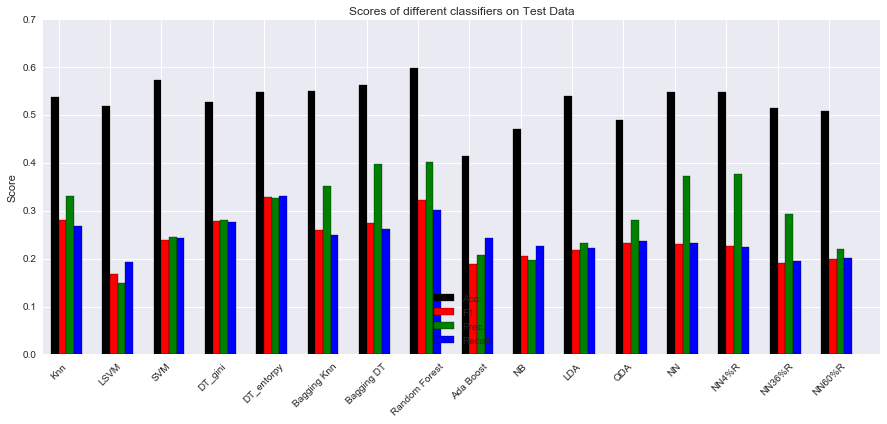

In [31]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 6)
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3)]

PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN2, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN3, average="macro")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN2, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN3, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN2, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN3, average="macro")]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.7)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN4%R' , 'NN36%R' , 'NN60%R']
ax.set_xticks(ind+width)
plt.rcParams['figure.figsize'] = (15, 12)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8 )
plt.show()

# Compute Confusion Matrix

In [14]:
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
targetLabel = ['3' , '4' , '5' , '6' , '7' , '8' , '9']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(targetLabel))
    plt.xticks(tick_marks, targetLabel, rotation=45)
    plt.yticks(tick_marks, targetLabel)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[  0   0   1   6   0   0   0]
 [  0   3  29  16   0   0   0]
 [  0   7 257 135  13   1   0]
 [  0   4 176 340  57   2   0]
 [  1   2  21  92  92   3   0]
 [  0   0   2  12  20   7   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.14  0.86  0.    0.    0.  ]
 [ 0.    0.06  0.6   0.33  0.    0.    0.  ]
 [ 0.    0.02  0.62  0.33  0.03  0.    0.  ]
 [ 0.    0.01  0.3   0.59  0.1   0.    0.  ]
 [ 0.    0.01  0.1   0.44  0.44  0.01  0.  ]
 [ 0.    0.    0.05  0.29  0.49  0.17  0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


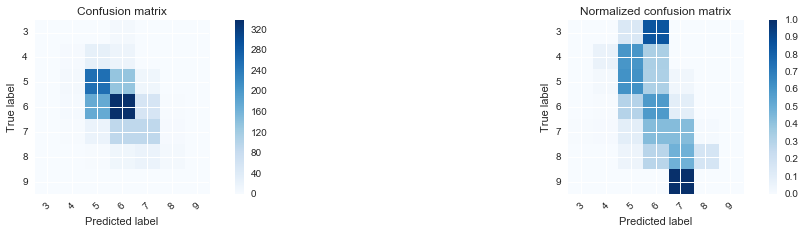

In [15]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


## Compute Confusion on LSVM

Confusion matrix, without normalization
[[  0   0   5   2   0   0   0]
 [  0   0  40   8   0   0   0]
 [  0   0 258 155   0   0   0]
 [  0   0 162 417   0   0   0]
 [  0   0  15 196   0   0   0]
 [  0   0   2  39   0   0   0]
 [  0   0   0   1   0   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.71  0.29  0.    0.    0.  ]
 [ 0.    0.    0.83  0.17  0.    0.    0.  ]
 [ 0.    0.    0.62  0.38  0.    0.    0.  ]
 [ 0.    0.    0.28  0.72  0.    0.    0.  ]
 [ 0.    0.    0.07  0.93  0.    0.    0.  ]
 [ 0.    0.    0.05  0.95  0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.  ]]


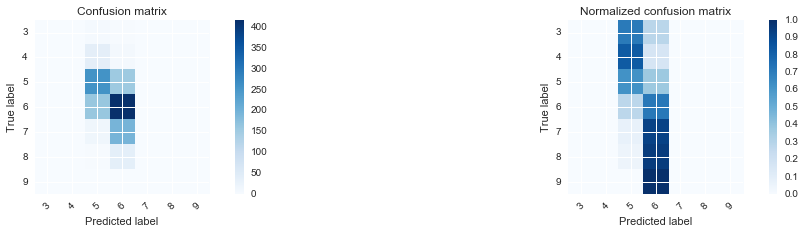

In [16]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[  0   0   3   4   0   0   0]
 [  0   0  39   9   0   0   0]
 [  0   0 272 136   5   0   0]
 [  0   0 137 400  41   1   0]
 [  0   0  11 125  75   0   0]
 [  0   0   0  26  15   0   0]
 [  0   0   0   1   0   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.43  0.57  0.    0.    0.  ]
 [ 0.    0.    0.81  0.19  0.    0.    0.  ]
 [ 0.    0.    0.66  0.33  0.01  0.    0.  ]
 [ 0.    0.    0.24  0.69  0.07  0.    0.  ]
 [ 0.    0.    0.05  0.59  0.36  0.    0.  ]
 [ 0.    0.    0.    0.63  0.37  0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.  ]]


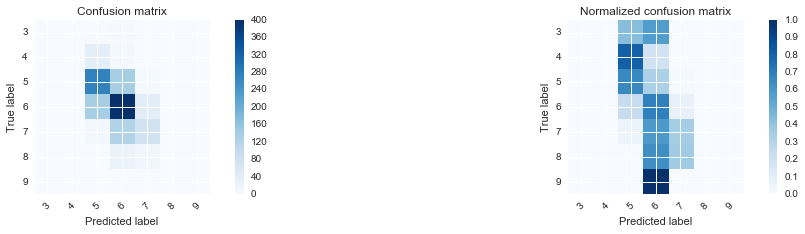

In [17]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[  0   1   3   2   1   0   0]
 [  0   8  24  14   2   0   0]
 [  1  15 239 131  23   4   0]
 [  1   8 134 338  80  17   1]
 [  0   2  21  79  96  12   1]
 [  0   1   3  16  15   6   0]
 [  0   0   0   1   0   0   0]]
Normalized confusion matrix
[[ 0.    0.14  0.43  0.29  0.14  0.    0.  ]
 [ 0.    0.17  0.5   0.29  0.04  0.    0.  ]
 [ 0.    0.04  0.58  0.32  0.06  0.01  0.  ]
 [ 0.    0.01  0.23  0.58  0.14  0.03  0.  ]
 [ 0.    0.01  0.1   0.37  0.45  0.06  0.  ]
 [ 0.    0.02  0.07  0.39  0.37  0.15  0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.  ]]


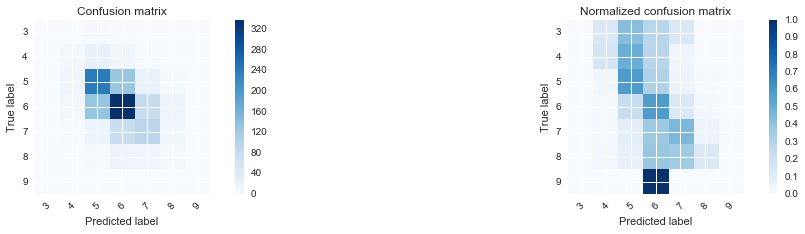

In [18]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[  1   1   3   2   0   0   0]
 [  1  11  20  13   3   0   0]
 [  4  15 242 117  29   6   0]
 [  2  10 120 350  81  16   0]
 [  0   2  25  72  98  14   0]
 [  0   0   3  12  14  12   0]
 [  0   0   0   0   0   1   0]]
Normalized confusion matrix
[[ 0.14  0.14  0.43  0.29  0.    0.    0.  ]
 [ 0.02  0.23  0.42  0.27  0.06  0.    0.  ]
 [ 0.01  0.04  0.59  0.28  0.07  0.01  0.  ]
 [ 0.    0.02  0.21  0.6   0.14  0.03  0.  ]
 [ 0.    0.01  0.12  0.34  0.46  0.07  0.  ]
 [ 0.    0.    0.07  0.29  0.34  0.29  0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.  ]]


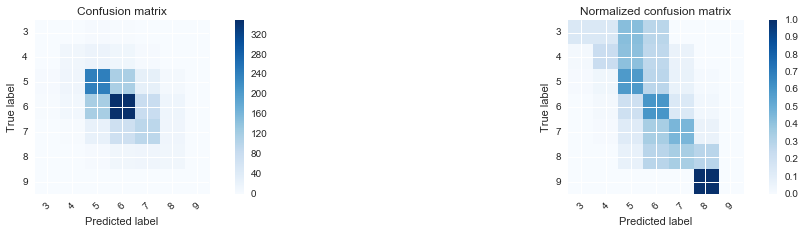

In [19]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[  0   0   3   4   0   0   0]
 [  0   0  32  16   0   0   0]
 [  0   0 260 148   5   0   0]
 [  0   0 152 381  45   1   0]
 [  0   0   9 131  71   0   0]
 [  0   0   0  22  14   5   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.43  0.57  0.    0.    0.  ]
 [ 0.    0.    0.67  0.33  0.    0.    0.  ]
 [ 0.    0.    0.63  0.36  0.01  0.    0.  ]
 [ 0.    0.    0.26  0.66  0.08  0.    0.  ]
 [ 0.    0.    0.04  0.62  0.34  0.    0.  ]
 [ 0.    0.    0.    0.54  0.34  0.12  0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


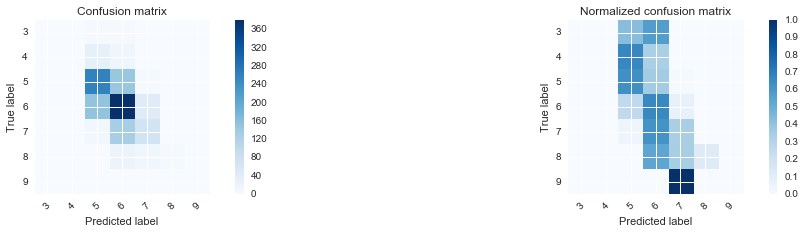

In [20]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[  0   0   2   5   0   0   0]
 [  0   1  30  17   0   0   0]
 [  0   5 292 113   3   0   0]
 [  0   2 171 364  42   0   0]
 [  0   1  16 125  69   0   0]
 [  0   0   1  23  11   6   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.29  0.71  0.    0.    0.  ]
 [ 0.    0.02  0.62  0.35  0.    0.    0.  ]
 [ 0.    0.01  0.71  0.27  0.01  0.    0.  ]
 [ 0.    0.    0.3   0.63  0.07  0.    0.  ]
 [ 0.    0.    0.08  0.59  0.33  0.    0.  ]
 [ 0.    0.    0.02  0.56  0.27  0.15  0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


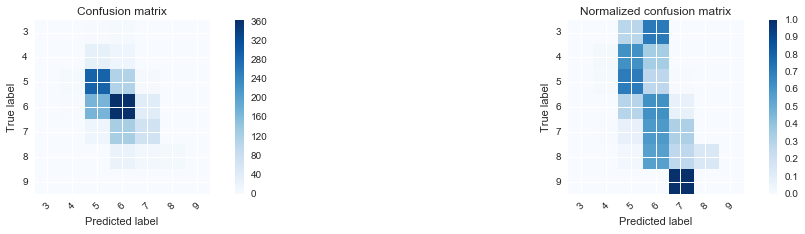

In [21]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[  0   1   3   3   0   0   0]
 [  0   4  29  14   1   0   0]
 [  0   2 285 116  10   0   0]
 [  0   5 136 391  45   2   0]
 [  0   0  17 104  88   2   0]
 [  0   0   0  19  12  10   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.14  0.43  0.43  0.    0.    0.  ]
 [ 0.    0.08  0.6   0.29  0.02  0.    0.  ]
 [ 0.    0.    0.69  0.28  0.02  0.    0.  ]
 [ 0.    0.01  0.23  0.68  0.08  0.    0.  ]
 [ 0.    0.    0.08  0.49  0.42  0.01  0.  ]
 [ 0.    0.    0.    0.46  0.29  0.24  0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


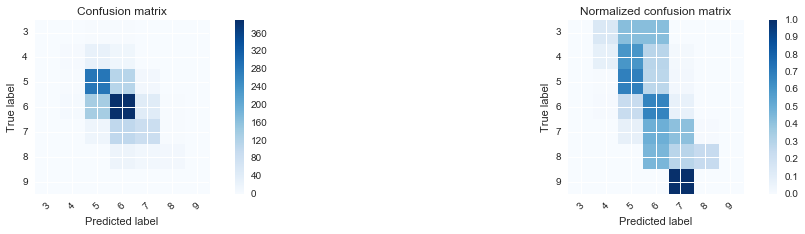

In [22]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[  3   0   2   2   0   0   0]
 [  9   0  26  13   0   0   0]
 [ 62   0 263  87   1   0   0]
 [ 76   0 240 220  43   0   0]
 [ 23   0  43  92  53   0   0]
 [  1   0   5  23  12   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.43  0.    0.29  0.29  0.    0.    0.  ]
 [ 0.19  0.    0.54  0.27  0.    0.    0.  ]
 [ 0.15  0.    0.64  0.21  0.    0.    0.  ]
 [ 0.13  0.    0.41  0.38  0.07  0.    0.  ]
 [ 0.11  0.    0.2   0.44  0.25  0.    0.  ]
 [ 0.02  0.    0.12  0.56  0.29  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


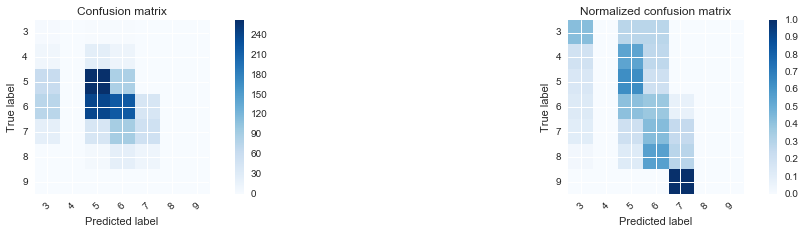

In [23]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[  0   0   5   1   1   0   0]
 [  0   0  32  13   3   0   0]
 [  1   0 289  96  27   0   0]
 [  2   2 236 215 122   0   2]
 [  0   0  32  70 108   1   0]
 [  0   0   5  10  26   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.71  0.14  0.14  0.    0.  ]
 [ 0.    0.    0.67  0.27  0.06  0.    0.  ]
 [ 0.    0.    0.7   0.23  0.07  0.    0.  ]
 [ 0.    0.    0.41  0.37  0.21  0.    0.  ]
 [ 0.    0.    0.15  0.33  0.51  0.    0.  ]
 [ 0.    0.    0.12  0.24  0.63  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


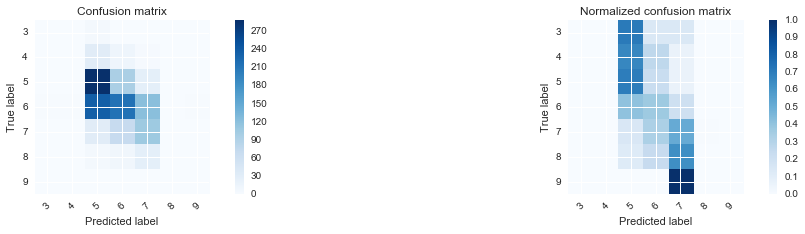

In [24]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[  0   0   4   3   0   0   0]
 [  0   0  38  10   0   0   0]
 [  0   0 242 169   2   0   0]
 [  0   0 143 403  33   0   0]
 [  0   0  12 142  57   0   0]
 [  0   0   1  29  11   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.57  0.43  0.    0.    0.  ]
 [ 0.    0.    0.79  0.21  0.    0.    0.  ]
 [ 0.    0.    0.59  0.41  0.    0.    0.  ]
 [ 0.    0.    0.25  0.7   0.06  0.    0.  ]
 [ 0.    0.    0.06  0.67  0.27  0.    0.  ]
 [ 0.    0.    0.02  0.71  0.27  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


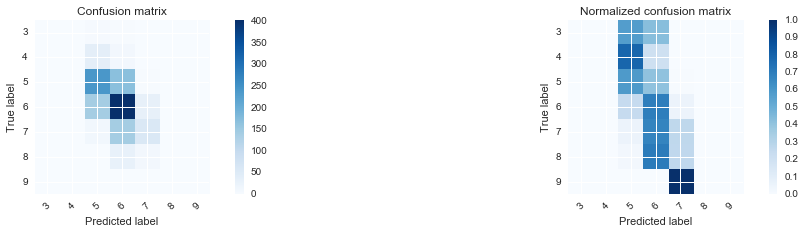

In [25]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[  0   0   3   4   0   0   0]
 [  0   1  37  10   0   0   0]
 [  1   2 247 147  16   0   0]
 [  4   1 169 278 127   0   0]
 [  0   0  15  82 109   5   0]
 [  0   0   1  16  22   2   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.43  0.57  0.    0.    0.  ]
 [ 0.    0.02  0.77  0.21  0.    0.    0.  ]
 [ 0.    0.    0.6   0.36  0.04  0.    0.  ]
 [ 0.01  0.    0.29  0.48  0.22  0.    0.  ]
 [ 0.    0.    0.07  0.39  0.52  0.02  0.  ]
 [ 0.    0.    0.02  0.39  0.54  0.05  0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


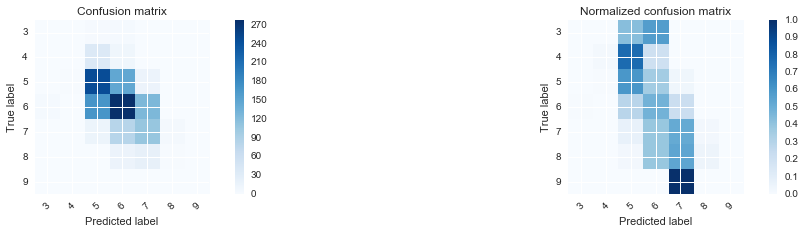

In [26]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[  0   0   4   3   0   0   0]
 [  0   1  38   9   0   0   0]
 [  0   0 255 153   5   0   0]
 [  0   0 139 392  48   0   0]
 [  0   0   9 136  66   0   0]
 [  0   0   0  26  15   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.57  0.43  0.    0.    0.  ]
 [ 0.    0.02  0.79  0.19  0.    0.    0.  ]
 [ 0.    0.    0.62  0.37  0.01  0.    0.  ]
 [ 0.    0.    0.24  0.68  0.08  0.    0.  ]
 [ 0.    0.    0.04  0.64  0.31  0.    0.  ]
 [ 0.    0.    0.    0.63  0.37  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


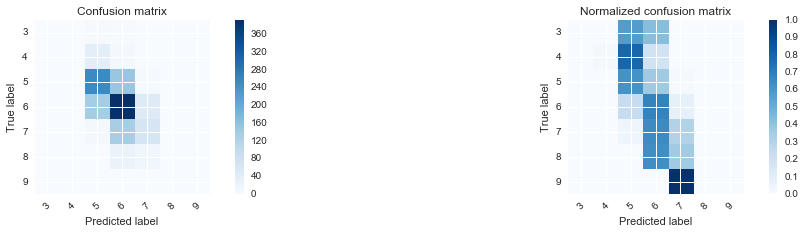

In [27]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 4% neurals removed

Confusion matrix, without normalization
[[  0   0   3   4   0   0   0]
 [  0   1  30  17   0   0   0]
 [  0   0 205 203   5   0   0]
 [  0   0  93 447  39   0   0]
 [  0   0   4 147  60   0   0]
 [  0   0   0  26  15   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.43  0.57  0.    0.    0.  ]
 [ 0.    0.02  0.62  0.35  0.    0.    0.  ]
 [ 0.    0.    0.5   0.49  0.01  0.    0.  ]
 [ 0.    0.    0.16  0.77  0.07  0.    0.  ]
 [ 0.    0.    0.02  0.7   0.28  0.    0.  ]
 [ 0.    0.    0.    0.63  0.37  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


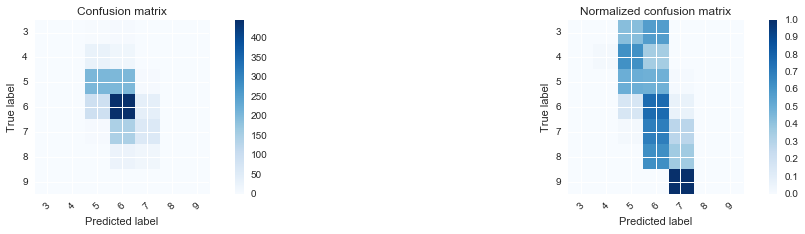

In [28]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 36% neurals removed


Confusion matrix, without normalization
[[  0   0   1   6   0   0   0]
 [  0   2  17  29   0   0   0]
 [  0   3 126 284   0   0   0]
 [  0   0  45 514  20   0   0]
 [  0   0   2 181  28   0   0]
 [  0   0   0  35   6   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.14  0.86  0.    0.    0.  ]
 [ 0.    0.04  0.35  0.6   0.    0.    0.  ]
 [ 0.    0.01  0.31  0.69  0.    0.    0.  ]
 [ 0.    0.    0.08  0.89  0.03  0.    0.  ]
 [ 0.    0.    0.01  0.86  0.13  0.    0.  ]
 [ 0.    0.    0.    0.85  0.15  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


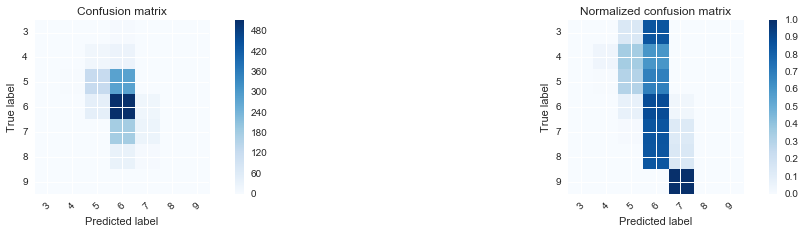

In [29]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

#### Compute Confusion on NN 60% neurals removed

Confusion matrix, without normalization
[[  0   0   4   3   0   0   0]
 [  0   0  24  23   1   0   0]
 [  0   0 154 254   5   0   0]
 [  0   0  88 453  38   0   0]
 [  0   0  10 147  54   0   0]
 [  0   0   0  32   9   0   0]
 [  0   0   0   0   1   0   0]]
Normalized confusion matrix
[[ 0.    0.    0.57  0.43  0.    0.    0.  ]
 [ 0.    0.    0.5   0.48  0.02  0.    0.  ]
 [ 0.    0.    0.37  0.62  0.01  0.    0.  ]
 [ 0.    0.    0.15  0.78  0.07  0.    0.  ]
 [ 0.    0.    0.05  0.7   0.26  0.    0.  ]
 [ 0.    0.    0.    0.78  0.22  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.  ]]


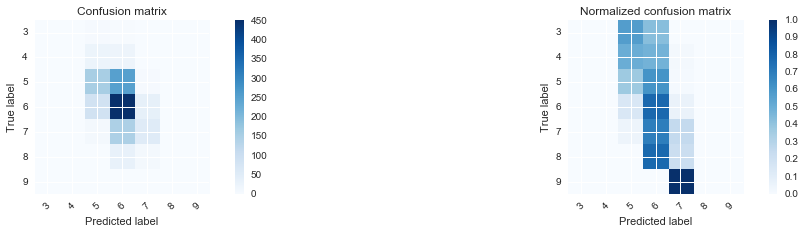

In [30]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()